In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import api_keys
from api_keys import api_key


In [2]:
countries = ['USA','GBR','FRA']


In [3]:
oly_data = pd.read_csv("./Summer.csv")
oly_data.head()
years=oly_data["Year"].unique()
ath_data = pd.read_csv("./kaggle_allathlete_olympics.csv")
ath_data.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
#create a list for each country that has the total athletes who participated each year
asdf= ath_data.groupby(["NOC","Year"])
ath_count = asdf.count()

usa_ath=ath_count.loc['USA']['ID']
usa_ath=usa_ath.reset_index()


gbr_ath=ath_count.loc['GBR']['ID']
gbr_ath=gbr_ath.reset_index()


fra_ath=ath_count.loc['FRA']['ID']
fra_ath=fra_ath.reset_index()


In [6]:
#data frame of medals won per year
all= oly_data.groupby(["Country","Year"])
all.sum()
grouped = all.sum()


In [7]:
#create a list of years where each country won medals 

usa = oly_data[oly_data['Country']== 'USA']
years_usa=usa["Year"].unique()

gbr = oly_data[oly_data['Country']== 'GBR']
years_gbr=gbr["Year"].unique()

fra = oly_data[oly_data['Country']== 'FRA']
years_fra=fra["Year"].unique()



In [8]:
#list of players that participated for the years where medals are won 

usa_with_loosers= usa_ath[usa_ath['Year'].isin(years_usa)]['ID']

gbr_with_loosers= gbr_ath[gbr_ath['Year'].isin(years_gbr)]['ID']

fra_with_loosers= fra_ath[fra_ath['Year'].isin(years_fra)]['ID']



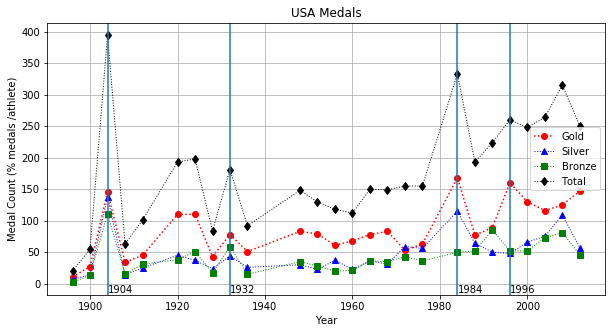

<Figure size 432x288 with 0 Axes>

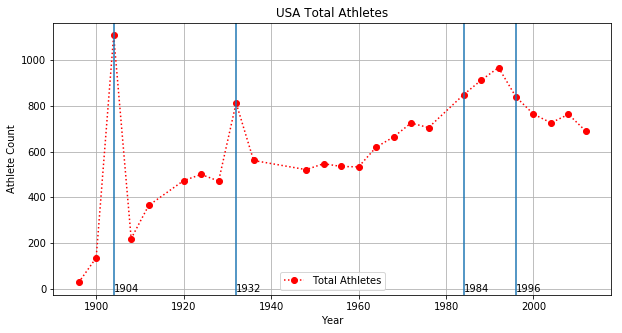

<Figure size 432x288 with 0 Axes>

In [9]:
fig, USA_Medals = plt.subplots(figsize=(10,5))

grouped.loc['USA']['Gold']
USA_Medals.grid(True)

Gold=plt.plot(years_usa, grouped.loc['USA']['Gold'].tolist(),marker="o",linestyle= ":",color="Red", label="Gold")
Silver=plt.plot(years_usa, grouped.loc['USA']['Silver'].tolist(),marker="^",linestyle= ":",color="b", linewidth=1, label="Silver")
Bronze=plt.plot(years_usa, grouped.loc['USA']['Bronze'].tolist(),marker="s",linestyle= ":",color="g", linewidth=1, label="Bronze")
Total=plt.plot(years_usa, grouped.loc['USA']['Total'].tolist(),marker="d",linestyle= ":",color="k", linewidth=1, label="Total")

usa_host_years= [1904,1932,1984,1996]

for years in usa_host_years:
    plt.axvline(x=years)
    plt.text(years,-15,f'{years}',rotation=0)
    
plt.title("USA Medals")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Medal Count (% medals /athlete)")
plt.show()
plt.savefig("./USA Medals.png")


fig, USA_Ath = plt.subplots(figsize=(10,5))

USA_Ath.grid(True)

plt.plot(years_usa, usa_with_loosers,marker="o",linestyle= ":",color="Red", label="Total Athletes")

for years in usa_host_years:
    plt.axvline(x=years)
    plt.text(years,-15,f'{years}',rotation=0)
    
plt.title("USA Total Athletes")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Athlete Count")
plt.show()
plt.savefig("./USA Total Athletes.png")

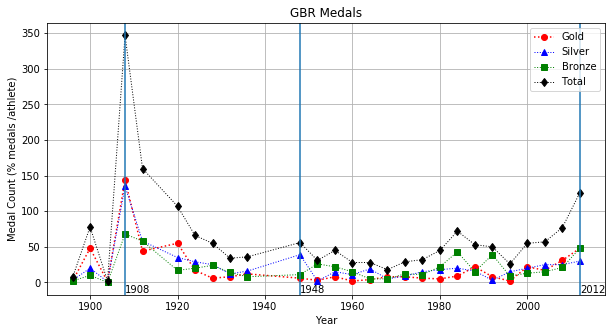

<Figure size 432x288 with 0 Axes>

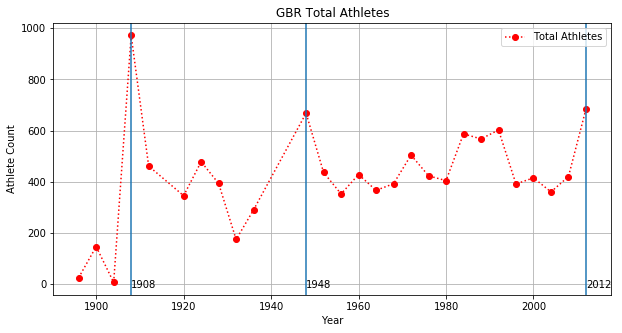

<Figure size 432x288 with 0 Axes>

In [10]:
fig, GBR_Medals = plt.subplots(figsize=(10,5))

grouped.loc['GBR']['Gold']
GBR_Medals.grid(True)
#these lines gives %medals/athletes
# Gold=plt.plot(years_gbr, grouped.loc['GBR']['Gold'].tolist()/gbr_with_loosers*100,marker="o",linestyle= ":",color="Red", label="Gold")
# Silver=plt.plot(years_gbr, grouped.loc['GBR']['Silver'].tolist()/gbr_with_loosers*100,marker="^",linestyle= ":",color="b", linewidth=1, label="Silver")
# Bronze=plt.plot(years_gbr, grouped.loc['GBR']['Bronze'].tolist()/gbr_with_loosers*100,marker="s",linestyle= ":",color="g", linewidth=1, label="Bronze")
# Total=plt.plot(years_gbr, grouped.loc['GBR']['Total'].tolist()/gbr_with_loosers*100,marker="d",linestyle= ":",color="k", linewidth=1, label="Total")


Gold=plt.plot(years_gbr, grouped.loc['GBR']['Gold'].tolist(),marker="o",linestyle= ":",color="Red", label="Gold")
Silver=plt.plot(years_gbr, grouped.loc['GBR']['Silver'].tolist(),marker="^",linestyle= ":",color="b", linewidth=1, label="Silver")
Bronze=plt.plot(years_gbr, grouped.loc['GBR']['Bronze'].tolist(),marker="s",linestyle= ":",color="g", linewidth=1, label="Bronze")
Total=plt.plot(years_gbr, grouped.loc['GBR']['Total'].tolist(),marker="d",linestyle= ":",color="k", linewidth=1, label="Total")

gbr_host_years= [1908,1948,2012]
for years in gbr_host_years:
    plt.axvline(x=years)
    plt.text(years,-15,f'{years}',rotation=0)

plt.title("GBR Medals")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Medal Count (% medals /athlete)")
plt.show()
plt.savefig("./GBR Medals.png")

fig, GBR_Ath = plt.subplots(figsize=(10,5))

GBR_Ath.grid(True)

plt.plot(years_gbr, gbr_with_loosers,marker="o",linestyle= ":",color="Red", label="Total Athletes")

for years in gbr_host_years:
    plt.axvline(x=years)
    plt.text(years,-15,f'{years}',rotation=0)
    
plt.title("GBR Total Athletes")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Athlete Count")
plt.show()
plt.savefig("./GBR Total Athletes.png")

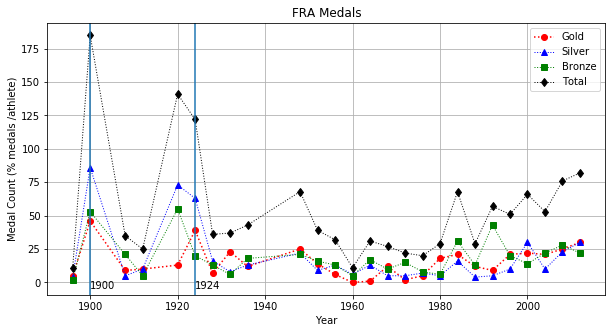

<Figure size 432x288 with 0 Axes>

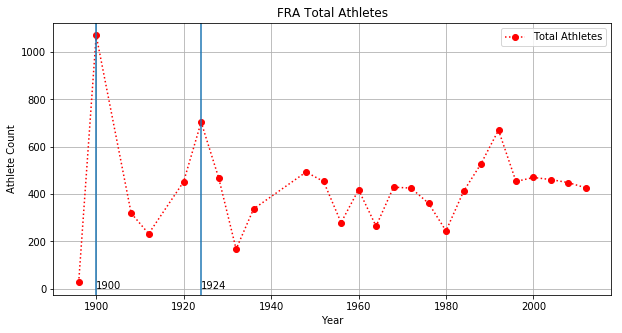

<Figure size 432x288 with 0 Axes>

In [14]:
fig, FRA_Medals = plt.subplots(figsize=(10,5))

grouped.loc['FRA']['Gold']
FRA_Medals.grid(True)

# Gold=plt.plot(years_fra, grouped.loc['FRA']['Gold'].tolist()/fra_with_loosers*100,marker="o",linestyle= ":",color="Red", label="Gold")
# Silver=plt.plot(years_fra, grouped.loc['FRA']['Silver'].tolist()/fra_with_loosers*100,marker="^",linestyle= ":",color="b", linewidth=1, label="Silver")
# Bronze=plt.plot(years_fra, grouped.loc['FRA']['Bronze'].tolist()/fra_with_loosers*100,marker="s",linestyle= ":",color="g", linewidth=1, label="Bronze")
# Total=plt.plot(years_fra, grouped.loc['FRA']['Total'].tolist()/fra_with_loosers*100,marker="d",linestyle= ":",color="k", linewidth=1, label="Total")

Gold=plt.plot(years_fra, grouped.loc['FRA']['Gold'].tolist(),marker="o",linestyle= ":",color="Red", label="Gold")
Silver=plt.plot(years_fra, grouped.loc['FRA']['Silver'].tolist(),marker="^",linestyle= ":",color="b", linewidth=1, label="Silver")
Bronze=plt.plot(years_fra, grouped.loc['FRA']['Bronze'].tolist(),marker="s",linestyle= ":",color="g", linewidth=1, label="Bronze")
Total=plt.plot(years_fra, grouped.loc['FRA']['Total'].tolist(),marker="d",linestyle= ":",color="k", linewidth=1, label="Total")

fra_host_years= [1900,1924]
for years in fra_host_years:
    plt.axvline(x=years)
    plt.text(years,-5,f'{years}',rotation=0)

plt.title("FRA Medals")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Medal Count (% medals /athlete)")
plt.show()
plt.savefig("./FRA Medals.png")


fig, FRA_Ath = plt.subplots(figsize=(10,5))

FRA_Ath.grid(True)

plt.plot(years_fra, fra_with_loosers,marker="o",linestyle= ":",color="Red", label="Total Athletes")

for years in fra_host_years:
    plt.axvline(x=years)
    plt.text(years,0,f'{years}',rotation=0)
    
plt.title("FRA Total Athletes")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Athlete Count")
plt.show()
plt.savefig("FRA Total Athletes.png")